# Aviation Accident Database & Synopses, up to 2023 Data Analysis

## Project Overview
This project analyzes the `Aviation Accident Database & Synopses` `dataset`, which contains records of civil aviation accidents and selected incidents from 1962 to 2023.

The goal is to extract meaningful insights through data cleaning, transformation, and visualization to support business decisions regarding which airplane types to consider for commercial and private use.

By identifying accident trends, evaluating safety records, and understanding the contributing factors to aviation incidents, this analysis aims to guide a new aviation division in selecting the safest and most suitable aircraft models for operation.

## Project Objectives
This project seeks to answer key business questions by:

* Identifying trends in airplane accidents and incidents.

* Highlighting low-risk airplane with the fewest accidents and fatalities.

* Analyzing contributing factors such as weather, mechanical failure or human error.

* Comparing safety records and identifying the best airplanes for commercial and private enterprises.

* Providing actionable recommendations to support airplane purchase decisions.

## Data Understanding
The `dataset` for this analysis is a from `Kaggle` [Aviation Accident Database & Synopses, up to 2023](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) which covers civil aviation accidents and selected incidents from 1962 to 2023, in the United States and international waters.

It includes detailed information on:

* Event Accident\Incident date and location

* Severity of injuries and damage

* Weather conditions and flight phase

* Investigation outcomes


The data is stored in an CSV file (`AviationData.csv`) and requires cleaning and preprocessing before analysis

## Business Understanding
The core business question is: 
`Which type of operating airplanes should be purchased for safe and reliable Commercial and Private operations?`
To answer this, the analysis will explore the following sub-questions:

1. What are the specifications of aircrafts and filter airplane in the dataset?
2. How many accidents or incidents has each airplane been involved in and Top 10 safest airplane?
3. What were the causes of the accidents or the incidents and the level of damage sustained on the airplane?
4. Are the said safest airplanes useful for commercial and private operations?


## Data Preparation
### Requirements
* Load and preview the data
    Understand the structure and contents.

* Handle missing values
    Identify and treat nulls appropriately.

* Convert date fields
    Standardize time-related features.

* Aggregate and clean text data
    Normalize categories for consistency and easier analysis.

In [1]:
# Importing data using the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading and previewing the data 
df = pd.read_csv("AviationData.csv", encoding ="cp1252", low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Checking the first five columns
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# Checking the last 5 columns
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
# Checking the shape and dimensionality of the dataset.
df.shape

(88889, 31)

* The dataset contains 88889 records(rows) and 31 features(columns).

In [6]:
#Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
# Checking for the dataset information 2
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Columns: 31 entries, Event.Id to Publication.Date
dtypes: float64(5), object(26)
memory usage: 21.0+ MB


* The columns in the dataset contain both string represented as object and decimal numbers as float. That is 5 numerical data and 26 categorical data.
* The data also contain dates `Publication.Date` identified as object. 
* There are several columns with missing values. Records should be `88889` which is not the case for most columns.

In [8]:
# Checking for statistical summary to get a better understanding of the dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
# Checking for summaries in the categorical data.
df.describe(include = 'object')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25589,27154,10374,24870,...,2,12,31,3,26,13590,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [10]:
# Checking for column names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

The columns names are partly clean a few needs cleaning. That is;
* They have no special characters
* No white spaces
* Names are descriptive and meaningful
* They contain dots(.) which is fine.
However,
* The title casing should be standardized
* Dates should be converted to Datetime

In [11]:
# Checking for duplicates
df.duplicated().sum()

0

* The dataset has no duplicates

In [12]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

* The are missing values in most columns in this dataset.

In [13]:
# Creating a data frame copy for use in data cleaning
df1 = df.copy(deep = True)
df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
# rechecking the column names
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [15]:
# Standardizing the column name cases
df1.columns= df1.columns.str.title()
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.Of.Engines', 'Engine.Type', 'Far.Description',
       'Schedule', 'Purpose.Of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.Of.Flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Question 1 : What are the specifications of aircrafts and filter airplane in the dataset?

* To identify will specification of the aircraft types, I will use the following columns; `Make`,`Model`,`Number.of.Engines`,`Engine.Type`,`Registration.Number`,`Aircraft.Category`,`Amateur.Built`,`Far.Description` and `Air.Carrier`
* I will filter by `Aircraft.Category` for `Airplane`.

### Data Preparation

In [16]:
# Checking for unique values in each categorical column.
columns1= ["Make","Model","Engine.Type","Registration.Number","Aircraft.Category","Amateur.Built","Far.Description", "Air.Carrier","Number.Of.Engines"]
unique_values ={col: df1[col].unique() for col in columns1}
for col, values in unique_values.items():
    print(f"\n{col}:\n{values}\n")


Make:
['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']


Model:
['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']


Engine.Type:
['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']


Registration.Number:
['NC6404' 'N5069P' 'N5142R' ... 'N749PJ' 'N210CU' 'N9026P']


Aircraft.Category:
[nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']


Amateur.Built:
['No' 'Yes' nan]


Far.Description:
[nan 'Part 129: Foreign' 'Part 91: General Aviation'
 'Part 135: Air Taxi & Commuter' 'Part 125: 20+ Pax,6000+ lbs'
 'Part 121: Air Carrier' 'Part 137: Agricultural'
 'Part 133: Rotorcraft Ext. Load' 'Unknown' 'Part 91F: Special Flt Ops.'
 'Non-U.S., Non-Commercial' 'Public Aircraft' 'Non-U.S., Commercial'
 'Public Use' 'Arm

In [17]:
# Checking missing values
df1[columns1].isna().sum()

Make                      63
Model                     92
Engine.Type             7096
Registration.Number     1382
Aircraft.Category      56602
Amateur.Built            102
Far.Description        56866
Air.Carrier            72241
Number.Of.Engines       6084
dtype: int64

## Data Cleaning

In [18]:
# cleaning each column by removing any white spaces, updating the cases, characters
df1["Make"]= df1["Make"].str.strip().str.title().str.replace(" ", ".")
df1["Make"].unique()                                              

array(['Stinson', 'Piper', 'Cessna', ..., 'James.R.Dernovsek',
       'Orlican.S.R.O', 'Royse.Ralph.L'], dtype=object)

In [19]:
# dealing with null values by dropping them since null values represent only 0.7% of records, hence not significant
df1 = df1.dropna(subset=["Make"])
df1["Make"].isna().sum()

0

In [20]:
# cleaning Model same case with make with few missing null at 0.10%
df1= df1.dropna(subset=["Model"])
df1["Model"].isna().sum()

0

In [21]:
# Engine types
df1["Engine.Type"].value_counts()

Engine.Type
Reciprocating      69496
Turbo Shaft         3609
Turbo Prop          3390
Turbo Fan           2478
Unknown             2048
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

In [22]:
# standardizing casing and removing white spaces 
df1["Engine.Type"]= df1["Engine.Type"].str.strip().str.title()
df1["Engine.Type"].value_counts()


Engine.Type
Reciprocating      69496
Turbo Shaft         3609
Turbo Prop          3390
Turbo Fan           2478
Unknown             2048
Turbo Jet            703
Geared Turbofan       12
Electric              10
Lr                     2
None                   2
Hybrid Rocket          1
Unk                    1
Name: count, dtype: int64

In [23]:
# replacing none,Unk with unknown and Lr with Long Range(Domain Knowledge)
df1["Engine.Type"]= df1["Engine.Type"].replace({"None":"Unknown",
                                               "Unk":"Unknown",
                                               "Lr":"Long Range"})
df1["Engine.Type"].isna().sum()

7025

In [24]:
# fillna missing values with unknown since engine type cannot be assumed, and its truthful
df1["Engine.Type"].fillna("Unknown", inplace=True)
df1["Engine.Type"].isna().sum()

0

In [25]:
# Registration Number replacing NONE and UNK with UNKNOWN since they represent the same thing
df1["Registration.Number"]= df1["Registration.Number"].replace({
    "NONE": "UNKNOWN",
    "UNK": "UNKNOWN"})


In [26]:
# fillna with UNKNOWN to avoid making assumptions
df1["Registration.Number"].fillna("UNKNOWN", inplace=True)
df1["Registration.Number"].isna().sum()

0

In [27]:
#Aircraft Category replacing WSFT and ULTR for Weight-Shift and Ultralight respectively(domain knowledge)
# UNK for Unknown and standardizing casing
df1["Aircraft.Category"]= df1["Aircraft.Category"].str.title()
df1["Aircraft.Category"].replace({"Unk":"Unknown",
                                "Wsft":"Weight-Shift",
                                "Ultr":"Ultralight"}, inplace=True)
df1["Aircraft.Category"].value_counts()

Aircraft.Category
Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Ultralight              31
Unknown                 16
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: count, dtype: int64

In [28]:
# fillna unknown for missing values to avoid assumptions
df1["Aircraft.Category"].fillna("Unknown", inplace=True)
df1["Aircraft.Category"].isna().sum()

0

In [29]:
# Amateur Built fillna with unknown although nulls represent only 0.11% of the records.
# I prefer to make it unknown without making any assumptions
df1["Amateur.Built"].fillna("Unknown", inplace=True)
df1["Amateur.Built"].isna().sum()

0

In [30]:
#Far Desription, contain numericals, i will map, to correct format and then replace them 
df1["Far.Description"].unique()

array([nan, 'Part 129: Foreign', 'Part 91: General Aviation',
       'Part 135: Air Taxi & Commuter', 'Part 125: 20+ Pax,6000+ lbs',
       'Part 121: Air Carrier', 'Part 137: Agricultural',
       'Part 133: Rotorcraft Ext. Load', 'Unknown',
       'Part 91F: Special Flt Ops.', 'Non-U.S., Non-Commercial',
       'Public Aircraft', 'Non-U.S., Commercial', 'Public Use',
       'Armed Forces', 'Part 91 Subpart K: Fractional', '091', 'NUSC',
       '135', 'NUSN', '121', '137', '129', '133', '091K', 'UNK', 'PUBU',
       'ARMF', '103', '125', '437', '107'], dtype=object)

In [31]:
#mapping to correct format
F_map = {"Part 91: General Aviation": "Part 91: General Aviation",
    "091": "Part 91: General Aviation",
    "091K": "Part 91: Fractional",
    "Part 91 Subpart K: Fractional": "Part 91: Fractional",

    "Part 121: Air Carrier": "Part 121: Air Carrier",
    "121": "Part 121: Air Carrier",

    "Part 135: Air Taxi & Commuter": "Part 135: Air Taxi",
    "135": "Part 135: Air Taxi",

    "Part 129: Foreign": "Part 129: Foreign",
    "129": "Part 129: Foreign",

    "Part 137: Agricultural": "Part 137: Agricultural",
    "137": "Part 137: Agricultural",

    "Part 125: 20+ Pax,6000+ lbs": "Part 125: Large Aircraft",
    "125": "Part 125: Large Aircraft",

    "Part 133: Rotorcraft Ext. Load": "Part 133: Rotorcraft",
    "133": "Part 133: Rotorcraft",

    "Part 91F: Special Flt Ops.": "Part 91F: Special Flight Ops",

    "Non-U.S., Non-Commercial": "Foreign: Non-Commercial",
    "Non-U.S., Commercial": "Foreign: Commercial",

    "Public Aircraft": "Public Use",
    "Public Use": "Public Use",
    "PUBU": "Public Use",

    "Armed Forces": "Military",
    "ARMF": "Military",
    "NUSC": "Military",
    "NUSN": "Military",

    "103": "Other",
    "107": "Other",
    "437": "Other",

    "UNK": "Unknown",
    "Unknown": "Unknown"}

df1["Far.Description"]= df1["Far.Description"].replace(F_map)
df1["Far.Description"].nunique()

15

In [32]:
# filling the missing values with unknown
df1["Far.Description"].fillna("Unknown", inplace=True)
df1["Far.Description"].value_counts()

Far.Description
Unknown                         57225
Part 91: General Aviation       24682
Military                         2568
Part 137: Agricultural           1445
Part 135: Air Taxi               1043
Part 121: Air Carrier             839
Part 129: Foreign                 342
Public Use                        274
Part 133: Rotorcraft              139
Foreign: Non-Commercial            96
Foreign: Commercial                91
Part 91: Fractional                15
Part 125: Large Aircraft           10
Other                               7
Part 91F: Special Flight Ops        1
Name: count, dtype: int64

In [33]:
# Air Carrier, standardizing cases, checking for value counts
df1["Air.Carrier"] = df1["Air.Carrier"].str.title()
df1["Air.Carrier"].value_counts().head(20)

Air.Carrier
Pilot                         258
American Airlines              89
United Airlines                89
Delta Air Lines                53
Delta Air Lines Inc            44
Southwest Airlines Co          44
American Airlines Inc          36
On File                        33
Continental Airlines           27
Ryanair                        27
Private Individual             27
American Airlines, Inc.        25
Usair                          24
Southwest Airlines             23
United Air Lines Inc           23
Continental Airlines, Inc.     21
Air Methods Corp               20
Air Canada                     20
Unknown                        17
Civil Air Patrol Inc           17
Name: count, dtype: int64

In [34]:
# mapping the air carrier to be able to replace the repetitions and check counts
C_map ={"American Airlines Inc": "American Airlines",
    "American Airlines, Inc.": "American Airlines",
    "Delta Air Lines Inc": "Delta Air Lines",
    "United Air Lines Inc": "United Airlines",
    "Southwest Airlines Co": "Southwest Airlines",
    "Continental Airlines, Inc.": "Continental Airlines",
    "Pilot": "Private Individual",
    "On File": "Unknown",
    "Unknown": "Unknown"}
df1["Air.Carrier"].replace(C_map, inplace=True)
df1["Air.Carrier"].value_counts()

Air.Carrier
Private Individual    285
American Airlines     150
United Airlines       112
Delta Air Lines        97
Southwest Airlines     67
                     ... 
Fabbri Nancy W          1
Nfss Inc                1
Williams Evan H         1
Dell Aero Inc           1
Mc Cessna 210N Llc      1
Name: count, Length: 13171, dtype: int64

In [35]:
# filling missing values with unknown, to avoid assumptions
df1["Air.Carrier"].fillna("Unknown", inplace= True)
df1["Air.Carrier"].value_counts()

Air.Carrier
Unknown               72218
Private Individual      285
American Airlines       150
United Airlines         112
Delta Air Lines          97
                      ...  
Mng Airlines              1
Fabbri Nancy W            1
Nfss Inc                  1
Williams Evan H           1
Mc Cessna 210N Llc        1
Name: count, Length: 13171, dtype: int64

In [36]:
#  checking counts for Number of Engines
df1["Number.Of.Engines"].value_counts()

Number.Of.Engines
1.0    69538
2.0    11072
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

In [37]:
# converting the column to numeric and fillna with unknown 
df1["Number.Of.Engines"]= pd.to_numeric(df1["Number.Of.Engines"],errors="coerce")
df1["Number.Of.Engines"] = df1["Number.Of.Engines"].apply(lambda x: "Unknown" if pd.isna(x) else str(int(x)))
df1["Number.Of.Engines"].isna().sum()

0

### Data Analysis

In [38]:
# Filtering Airplane from Aircraft.Category and rechecking counts
df1["Aircraft.Category"].value_counts()

Aircraft.Category
Unknown              56548
Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           170
Powered Parachute       91
Ultralight              31
Powered-Lift             5
Blimp                    4
Rocket                   1
Name: count, dtype: int64

In [39]:
#Filtering Airplane and confirming shape
Airplanes_df1 = df1[df1["Aircraft.Category"] == "Airplane"]
Airplanes_df1.shape[0]

27580

In [40]:
# creating a simple version of Aircraft Type to enhance readability and plotting in the next questions
df1["Aircraft.Simple"] = (df1["Make"] + df1["Model"])
df1["Aircraft.Simple"].value_counts()

Aircraft.Simple
Cessna152                             2366
Cessna172                             1753
Cessna172N                            1163
PiperPA-28-140                         932
Cessna150                              829
                                      ... 
BauerVANS RV-4                           1
VelocityVELOCITY ELITE RG                1
IverslieKIT FOX                          1
Consolidated-VulteePBY-5A(28-5ACF)       1
Royse.Ralph.LGLASAIR                     1
Name: count, Length: 18465, dtype: int64

### Univariate Analysis : Distribution of Number of Engines in Airplanes


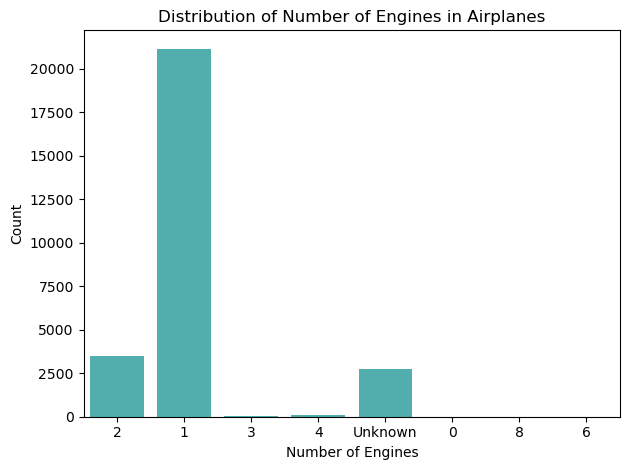

In [41]:
# Distribution of Number of Engines in Airplanes using bar chart
Airplanes_df1 = df1[df1["Aircraft.Category"] == "Airplane"]

sns.countplot(data=Airplanes_df1, x="Number.Of.Engines", color='#42bdbc')
plt.title("Distribution of Number of Engines in Airplanes")
plt.xlabel("Number of Engines")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Bivariate Analysis: Engine Type vs Amateur Built in Airplanes

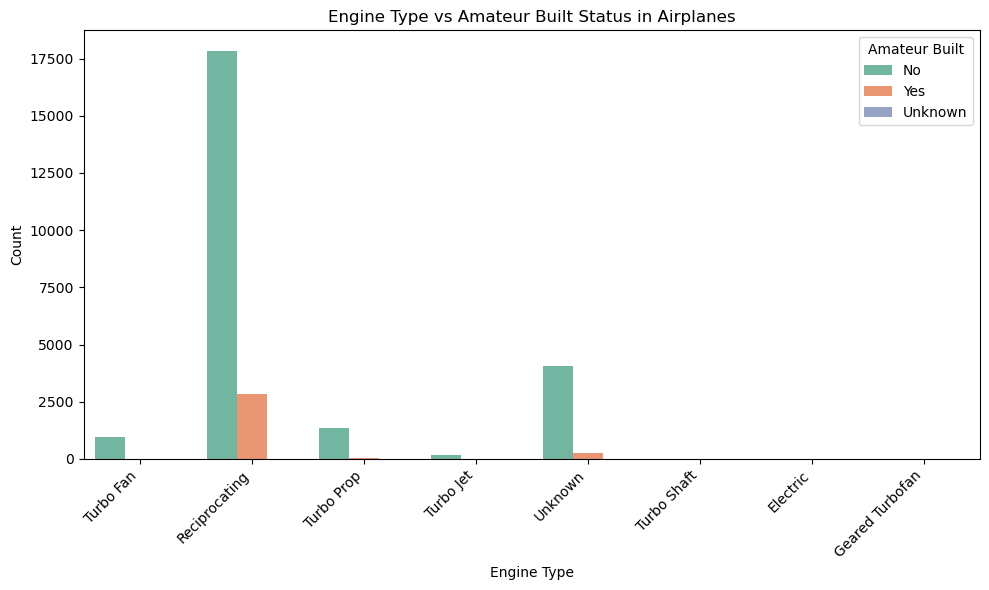

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=Airplanes_df1, x="Engine.Type", hue="Amateur.Built", palette="Set2")
plt.title("Engine Type vs Amateur Built Status in Airplanes")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Amateur Built")
plt.tight_layout()
plt.show()

### Multivariate Analysis :   Engine Type vs Amateur Built, grouped by Number of Engines

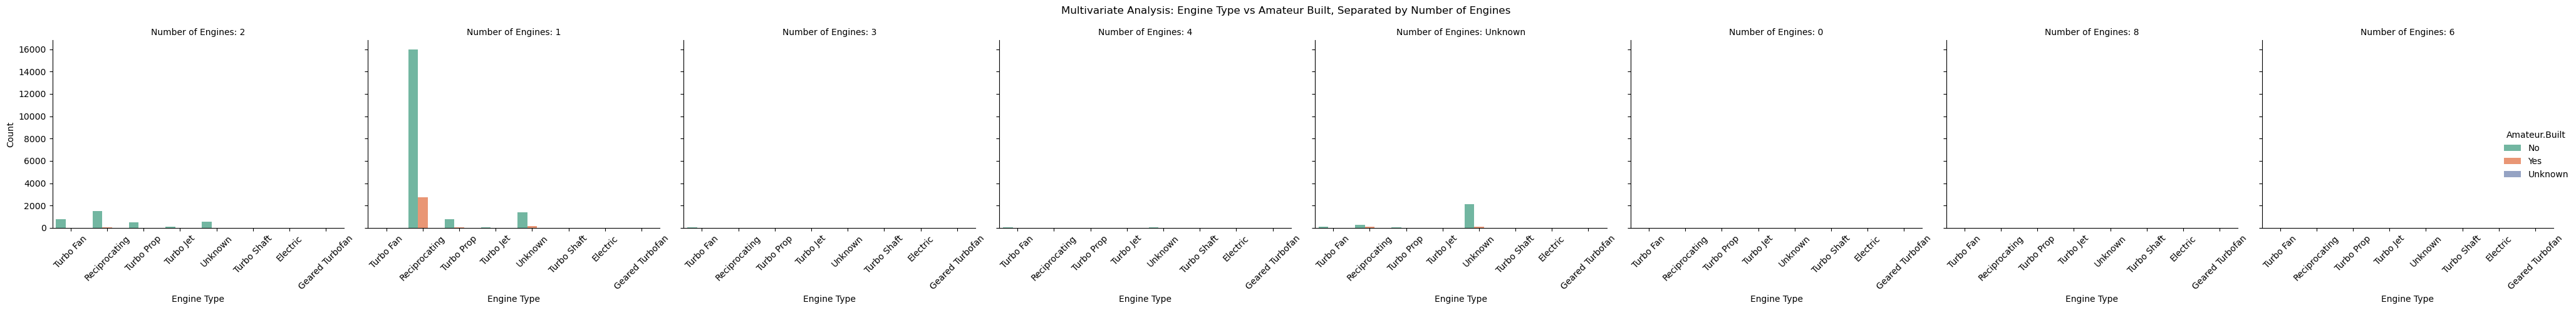

In [43]:
plot_df1 = Airplanes_df1[["Engine.Type", "Amateur.Built", "Number.Of.Engines"]].copy()
plot_df1["Number.Of.Engines"] = plot_df1["Number.Of.Engines"].astype(str)
grouped = sns.catplot(data=plot_df1,x="Engine.Type", hue="Amateur.Built",col="Number.Of.Engines",kind="count",palette="Set2")
grouped.set_titles("Number of Engines: {col_name}")
grouped.set_axis_labels("Engine Type", "Count")
grouped.set_xticklabels(rotation=45)
grouped.fig.subplots_adjust(top=0.85)
grouped.fig.suptitle("Multivariate Analysis: Engine Type vs Amateur Built, Separated by Number of Engines", fontsize=12)
plt.tight_layout()
plt.show()

### Key Insights.
Analysis on Aircraft Specifications with focus on Airplanes indicate that
* Most Airplanes have 1 engine.
* Reciprocating engine types are the most common among airplanes.
* Most Airplanes are not Amateur Built


##### Note
* `Far.Description` and `Air.Category` will be extracted later when answering purpose of flight.

Dropping columns not relevant for my business question. 
    The columns are `Latitude`,`Longitude`,`Airport.Code`,`Airport.Name`,`Schedule`.

In [44]:
# dropping irrelevant columns
df1.drop(["Latitude", "Longitude", "Airport.Code", "Airport.Name", "Schedule"], axis=1, inplace=True)

In [45]:
# confirming if dropped
df1.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.Damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.Of.Engines', 'Engine.Type', 'Far.Description',
       'Purpose.Of.Flight', 'Air.Carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.Phase.Of.Flight', 'Report.Status',
       'Publication.Date', 'Aircraft.Simple'],
      dtype='object')

## Question 2: How many accidents or incidents has each airplane been involved in and Top 10 safest airplane?

* Columns to incorporate `Event.Id`, `Investigation.Type`,`Accident.Number`,`Injury.Severity`, `Location`, `Country`,`Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured`,`Event.Date`,`Publication.Date` to determine accidents and incidents each airplane type was involved in, and its related risk rates. 


### Data Preparation

In [46]:
# checking for the unique values for the columns incorporated
columns2= ["Event.Id","Investigation.Type","Accident.Number","Injury.Severity","Location","Country","Total.Fatal.Injuries",
           "Total.Serious.Injuries","Total.Minor.Injuries","Total.Uninjured","Event.Date","Publication.Date"]
unique_values ={col: df1[col].unique() for col in columns2}
for col, values in unique_values.items():
    print(f"\n{col}:\n{values}\n")


Event.Id:
['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']


Investigation.Type:
['Accident' 'Incident']


Accident.Number:
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097']


Injury.Severity:
['Fatal(2)' 'Fatal(4)' 'Fatal(3)' 'Fatal(1)' 'Non-Fatal' 'Incident'
 'Fatal(8)' 'Fatal(78)' 'Fatal(7)' 'Fatal(6)' 'Fatal(5)' 'Fatal(153)'
 'Fatal(12)' 'Fatal(14)' 'Fatal(23)' 'Fatal(10)' 'Fatal(11)' 'Fatal(9)'
 'Fatal(17)' 'Fatal(13)' 'Fatal(29)' 'Fatal(70)' 'Unavailable'
 'Fatal(135)' 'Fatal(31)' 'Fatal(256)' 'Fatal(25)' 'Fatal(82)'
 'Fatal(156)' 'Fatal(28)' 'Fatal(18)' 'Fatal(43)' 'Fatal(15)' 'Fatal(270)'
 'Fatal(144)' 'Fatal(174)' 'Fatal(111)' 'Fatal(131)' 'Fatal(20)'
 'Fatal(73)' 'Fatal(27)' 'Fatal(34)' 'Fatal(87)' 'Fatal(30)' 'Fatal(16)'
 'Fatal(47)' 'Fatal(56)' 'Fatal(37)' 'Fatal(132)' 'Fatal(68)' 'Fatal(54)'
 'Fatal(52)' 'Fatal(65)' 'Fatal(72)' 'Fatal(160)' 'Fatal(189)'
 'Fatal(123)' 'Fatal(33)'

In [47]:
# Checking for missing values in the columns
df1[columns2].isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Injury.Severity             979
Location                     52
Country                     225
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Event.Date                    0
Publication.Date          13765
dtype: int64

### Data Cleaning

In [48]:
# Filling null values in Publication Date with by assumption "1900-01-01"
df1["Publication.Date"].fillna(pd.Timestamp("1900-01-01"), inplace=True)
df1["Publication.Date"].isna().sum()

0

In [49]:
# filling null values in Location and Country with Unknown
df1["Location"].fillna("Unknown", inplace=True)
df1["Country"].fillna("Unknown", inplace=True)
df1["Country"].isna().sum()
df1["Location"].isna().sum()

0

In [50]:
# cleaning and standardizing Injury severity cases using 'isinstance(x, str) and'parse float values and also fillna with unknown
df1["Injury.Severity"] = ["Incident" if isinstance(x, str) and "incident" in x.lower()
    else "Fatal" if isinstance(x, str) and "fatal" in x.lower()
    else "Non-Fatal" if isinstance(x, str) and "non-fatal" in x.lower()
    else "Unknown"
    for x in df1["Injury.Severity"]]
df1["Injury.Severity"].value_counts().head(20)

Injury.Severity
Fatal       85098
Incident     2214
Unknown      1465
Name: count, dtype: int64

In [51]:
df1["Injury.Severity"].isna().sum()

0

In [52]:
#dealing with total injuries, since median is 0 for Fatal,Serious and Minor injuries,
# i will replace the missing values with 0. The percentages of missing values in these columns are
# approximately 13%,14%,13% respectively 
df1["Total.Injuries"] = (df1["Total.Fatal.Injuries"].fillna(0) + df1["Total.Serious.Injuries"].fillna(0) +
                         df1["Total.Minor.Injuries"].fillna(0))
df1["Total.Injuries"].isna().sum()

0

In [53]:
# Total uninjured mean is 5.3 and median is 1 suggesting that data is right-skewed, very few but high values pulling the mean up.
# i will fillna with median to avoid overestimating values due to outliers
df1["Total.Uninjured"].fillna(1, inplace=True)
df1["Total.Uninjured"].isna().sum()

0

### Data Analysis

To answer question 2, i need to analyze;

* High-risk airplane: Many events, high fatality rate

* Low-risk (safe) airplane: Many events, low fatality rate

* Get total number of accidents/incidents

* Identify top recommended safe airplane types



In [54]:
columns_2a = ["Aircraft.Simple", "Event.Id", "Investigation.Type", "Accident.Number",
              "Injury.Severity", "Location", "Country","Total.Injuries", "Total.Uninjured", 
              "Event.Date", "Publication.Date"]
Aircraft_Event = df1[columns_2a].dropna(subset=["Aircraft.Simple", "Event.Id"])
Aircraft_Event.head(10)

,Aircraft.Simple,Event.Id,Investigation.Type,Accident.Number,Injury.Severity,Location,Country,Total.Injuries,Total.Uninjured,Event.Date,Publication.Date
0,Stinson108-3,20001218X45444,Accident,SEA87LA080,Fatal,"MOOSE CREEK, ID",United States,2.0,0.0,1948-10-24,1900-01-01 00:00:00
1,PiperPA24-180,20001218X45447,Accident,LAX94LA336,Fatal,"BRIDGEPORT, CA",United States,4.0,0.0,1962-07-19,19-09-1996
2,Cessna172M,20061025X01555,Accident,NYC07LA005,Fatal,"Saltville, VA",United States,3.0,1.0,1974-08-30,26-02-2007
3,Rockwell112,20001218X45448,Accident,LAX96LA321,Fatal,"EUREKA, CA",United States,2.0,0.0,1977-06-19,12-09-2000
4,Cessna501,20041105X01764,Accident,CHI79FA064,Fatal,"Canton, OH",United States,3.0,0.0,1979-08-02,16-04-1980
5,Mcdonnell.DouglasDC9,20170710X52551,Accident,NYC79AA106,Fatal,"BOSTON, MA",United States,1.0,44.0,1979-09-17,19-09-2017
6,Cessna180,20001218X45446,Accident,CHI81LA106,Fatal,"COTTON, MN",United States,4.0,0.0,1981-08-01,06-11-2001
7,Cessna140,20020909X01562,Accident,SEA82DA022,Fatal,"PULLMAN, WA",United States,0.0,2.0,1982-01-01,01-01-1982
8,Cessna401B,20020909X01561,Accident,NYC82DA015,Fatal,"EAST HANOVER, NJ",United States,0.0,2.0,1982-01-01,01-01-1982
9,North.AmericanNAVION L-17B,20020909X01560,Accident,MIA82DA029,Fatal,"JACKSONVILLE, FL",United States,3.0,0.0,1982-01-01,01-01-1982


In [55]:
# updating Aircraft Simple as string
df1["Aircraft.Simple"] = df1["Make"].astype(str) + " " + df1["Model"].astype(str)

In [56]:
# calculating severity counts
Severity_Counts= df1.groupby(["Aircraft.Simple", "Injury.Severity"])["Event.Id"].count().unstack(fill_value=0)

In [57]:
# adding total events and fatal rates
Severity_Counts["Total.Events"] = Severity_Counts.sum(axis=1)
Severity_Counts["Fatal.Rate"] = (Severity_Counts.get("Fatal", 0) / Severity_Counts["Total.Events"]).round(2)
Severity_Counts

Injury.Severity,Fatal,Incident,Unknown,Total.Events,Fatal.Rate
Aircraft.Simple,,,,,
107.5.Flying.Corporation One Design DR 107,1,0,0,1,1.0
1200 G103,1,0,0,1,1.0
177Mf.Llc PITTS MODEL 12,1,0,0,1,1.0
1977.Colfer-Chan STEEN SKYBOLT,1,0,0,1,1.0
1St.Ftr.Gp FOCKE-WULF 190,1,0,0,1,1.0
...,...,...,...,...,...
Zubair.S.Khan RAVEN,1,0,0,1,1.0
Zuber.Thomas.P ZUBER SUPER DRIFTER,1,0,0,1,1.0
Zukowski EAA BIPLANE,1,0,0,1,1.0


In [58]:
# resetting Aircraft Simple back to column
Severity_Counts = Severity_Counts.reset_index()

In [59]:
# Filtering fatal rate more than 10% for at least 5 events to get safe airplanes
Safe_Airplanes = Severity_Counts[(Severity_Counts["Fatal.Rate"] <= 0.10) & (Severity_Counts["Total.Events"] >= 5)]
Safe_Airplanes

Injury.Severity,Aircraft.Simple,Fatal,Incident,Unknown,Total.Events,Fatal.Rate
949,Airbus.Industrie A300-600,0,8,0,8,0.0
3239,Boeing 737-130,0,6,0,6,0.0
3337,Boeing 747-123,0,7,0,7,0.0
6917,Douglas DC-8-71,0,5,0,5,0.0
6933,Douglas DC-9-51,0,7,0,7,0.0
11683,Mcdonnell.Douglas DC-10-40,0,7,0,7,0.0
11700,Mcdonnell.Douglas DC-9,0,5,0,5,0.0


In [60]:
# getting the top 10 safe
Top_Safe = Safe_Airplanes.sort_values(by=["Total.Events", "Fatal.Rate"], ascending=[False, True]).head(10)
Top_Safe

Injury.Severity,Aircraft.Simple,Fatal,Incident,Unknown,Total.Events,Fatal.Rate
949,Airbus.Industrie A300-600,0,8,0,8,0.0
3337,Boeing 747-123,0,7,0,7,0.0
6933,Douglas DC-9-51,0,7,0,7,0.0
11683,Mcdonnell.Douglas DC-10-40,0,7,0,7,0.0
3239,Boeing 737-130,0,6,0,6,0.0
6917,Douglas DC-8-71,0,5,0,5,0.0
11700,Mcdonnell.Douglas DC-9,0,5,0,5,0.0


### Univariate Analysis: Top 10 Safe Airplanes Vs Number of Events

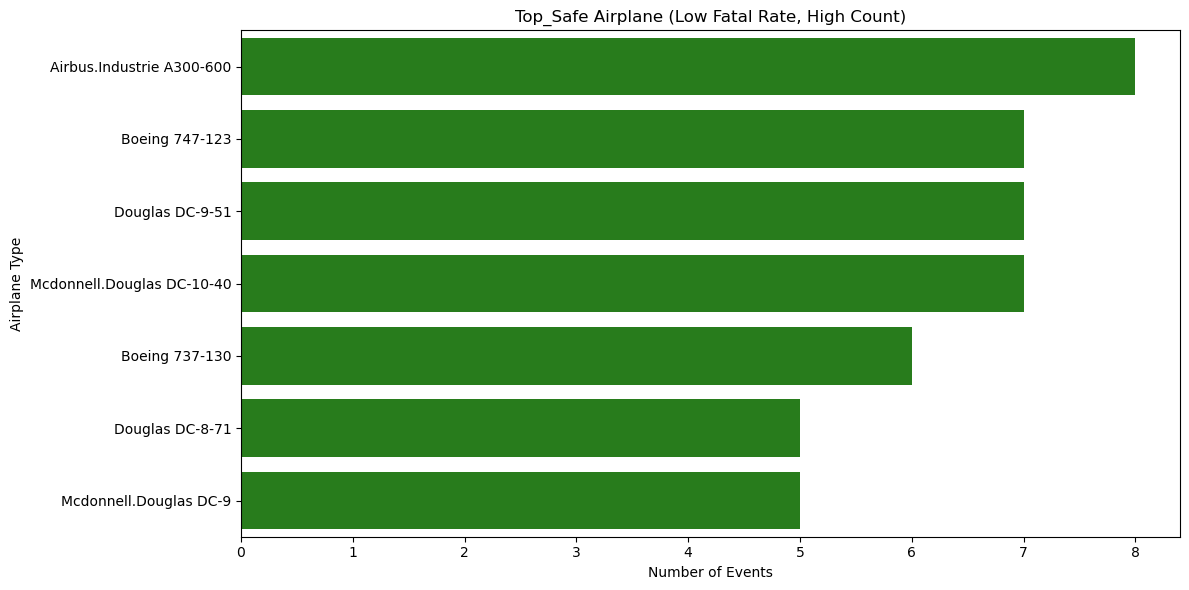

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(data=Top_Safe, y="Aircraft.Simple", x="Total.Events", color="#1c8c0c")
plt.title("Top_Safe Airplane (Low Fatal Rate, High Count)")
plt.xlabel("Number of Events")
plt.ylabel("Airplane Type")
plt.tight_layout()
plt.show()

### Bivariate Analysis: Injury Severity by Investigation Type

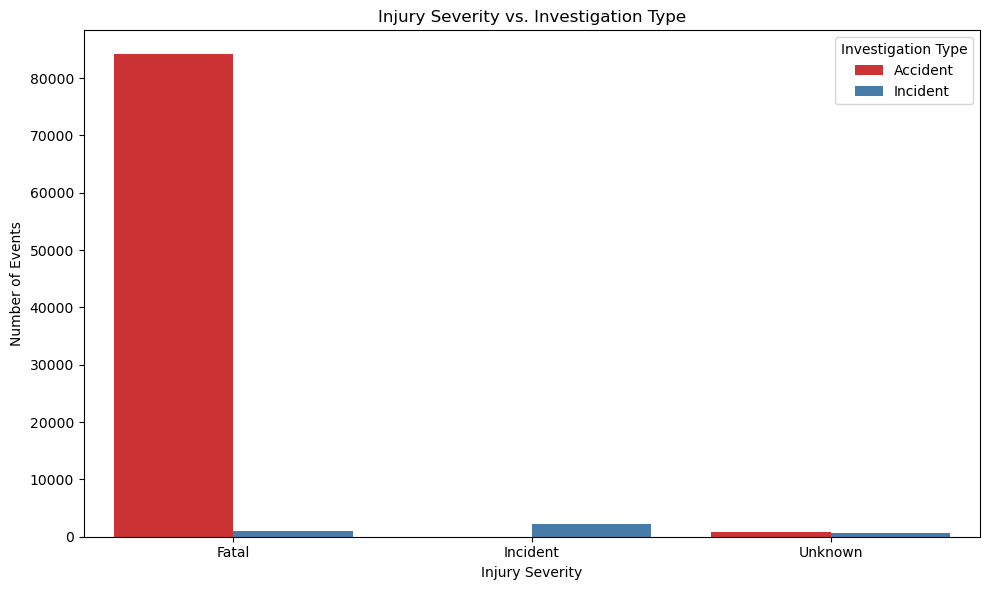

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x="Injury.Severity", hue="Investigation.Type", palette="Set1")
plt.title("Injury Severity vs. Investigation Type")
plt.xlabel("Injury Severity")
plt.ylabel("Number of Events")
plt.legend(title="Investigation Type")
plt.tight_layout()
plt.show()

In [63]:
df1["Event.Date"] = pd.to_datetime(df1["Event.Date"], errors="coerce")
df1.loc[:, "Event.Year"] = df1["Event.Date"].dt.year


### Multivariate Analysis: Trend of Injury Severity Over the Years, grouped by Aircraft Type

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


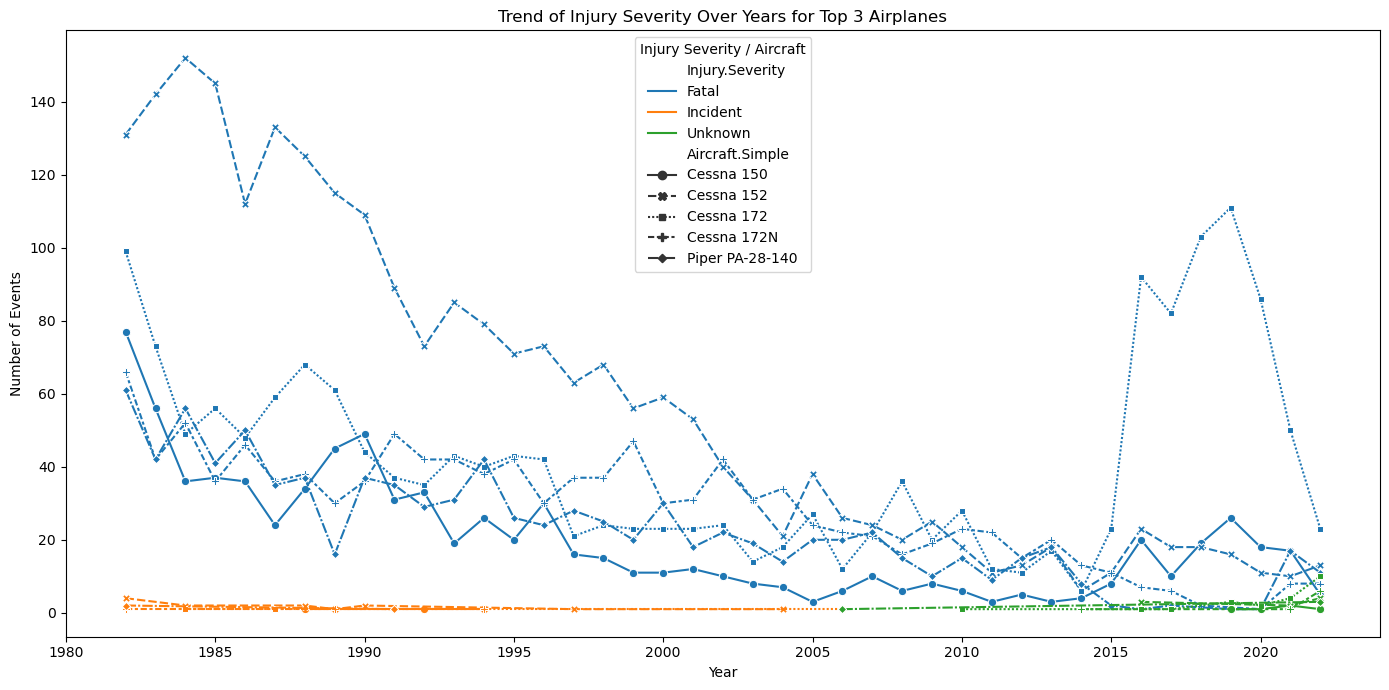

In [64]:
df1["Event.Date"] = pd.to_datetime(df1["Event.Date"], errors="coerce")
df1.loc[:, "Event.Year"] = df1["Event.Date"].dt.year
df1 = df1[(df1["Event.Year"] >= 1980) & (df1["Event.Year"] <= 2023)]
top_aircrafts = df1["Aircraft.Simple"].value_counts().head(5).index
filtered_df = df1[df1["Aircraft.Simple"].isin(top_aircrafts)]
line_df = filtered_df.groupby(["Event.Year", "Aircraft.Simple", "Injury.Severity"]).size().reset_index(name="Count")
plt.figure(figsize=(14, 7))
sns.lineplot(data=line_df, x="Event.Year", y="Count", hue="Injury.Severity", style="Aircraft.Simple", markers=True)
plt.title("Trend of Injury Severity Over Years for Top 3 Airplanes")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.legend(title="Injury Severity / Aircraft")
plt.tight_layout()
plt.show()

### Key Insights
Analysis of top safe airplanes in regards to severity of events involves indicate that:

* Airbus.Industrie A300, Boeing 747-123, Douglas DC-9-51, Mcdonnell.Douglas DC-10-40,Boeing 737-130 are top 5 most safe airplanes with low fatalities but high counts.
* Accidents where the highest causes of fatalities compared to incidents.
* Cessna models have had high counts of fatal accidents over time.


## Question 3 : What were the causes of the accidents or the incidents and the level of damage sustained on the airplane?

 To determine the causes of accidents and the level of damage on the airplane i will use
 `Weather.Condition`
 `Report.Status`
 `Broad.Phase.Of.Flight`.
 `Aircraft.Damage`


### Data Preparation

In [65]:
columns3= ["Report.Status", "Broad.Phase.Of.Flight", "Aircraft.Damage","Weather.Condition"]
unique_values ={col: df1[col].unique() for col in columns3}
for col, values in unique_values.items():
    print(f"\n{col}:\n{values}\n")


Report.Status:
['Probable Cause' 'Factual' 'Foreign' ...
 'The pilot did not ensure adequate clearance from construction vehicles during taxi.'
 'The pilot’s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.'
 'The pilot’s loss of control due to a wind gust during landing.']


Broad.Phase.Of.Flight:
['Unknown' 'Takeoff' 'Landing' 'Cruise' 'Approach' 'Taxi' 'Descent'
 'Maneuvering' 'Climb' 'Standing' 'Go-around' 'Other' nan]


Aircraft.Damage:
['Destroyed' 'Substantial' 'Minor' nan 'Unknown']


Weather.Condition:
['IMC' 'VMC' 'UNK' nan 'Unk']



In [66]:
df1[columns3].isna().sum()

Report.Status             6338
Broad.Phase.Of.Flight    27094
Aircraft.Damage           3172
Weather.Condition         4439
dtype: int64

In [67]:
df1[columns3].value_counts()

Report.Status   Broad.Phase.Of.Flight  Aircraft.Damage  Weather.Condition
Probable Cause  Landing                Substantial      VMC                  13694
                Takeoff                Substantial      VMC                   8988
                Cruise                 Substantial      VMC                   5861
                Maneuvering            Substantial      VMC                   4231
                Approach               Substantial      VMC                   4003
                                                                             ...  
                Other                  Substantial      UNK                      1
                                       Minor            UNK                      1
                                       Destroyed        IMC                      1
Foreign         Takeoff                Destroyed        VMC                      1
                Approach               Destroyed        VMC                      1
Name: count, 

### Data Cleaning

In [68]:
# filtering the unique values in weather condition
df1["Weather.Condition"].unique()

array(['IMC', 'VMC', 'UNK', nan, 'Unk'], dtype=object)

* Domain knowledge in aviation suggest that the abbreviation represented in the Weather conditions are;

    `UNK` alias Unknown, weather not recorded.
    
    `IMC` alias Instrument Meteorological Conditions meaning, poor weather
    
    `VMC` alias Visual Meteorological Conditions meaning good visibility
    

In [69]:
# fillna missing values with UNK that is Unknown
df1["Weather.Condition"]= df1["Weather.Condition"].str.upper().fillna("UNK")
df1["Weather.Condition"].isna().sum()

0

In [70]:
# Phase of flight replace - with_ and fillna with unknown since no records were available and although it represents 44% of the records, it is truthful
df1["Broad.Phase.Of.Flight"] = df1["Broad.Phase.Of.Flight"].str.replace("-","_").fillna("Unknown")
df1["Broad.Phase.Of.Flight"].unique()

array(['Unknown', 'Takeoff', 'Landing', 'Cruise', 'Approach', 'Taxi',
       'Descent', 'Maneuvering', 'Climb', 'Standing', 'Go_around',
       'Other'], dtype=object)

In [71]:
# Aircraft Damage fill na with Unknown
df1["Aircraft.Damage"] = df1["Aircraft.Damage"].fillna("Unknown")
df1["Aircraft.Damage"].value_counts()

Aircraft.Damage
Substantial    64096
Destroyed      18592
Unknown         3291
Minor           2792
Name: count, dtype: int64

In [72]:
df1["Investigation.Type"].value_counts()

Investigation.Type
Accident    84931
Incident     3840
Name: count, dtype: int64

In [73]:
# Report Status top 20 counts
df1["Report.Status"].value_counts().head(20)

Report.Status
Probable Cause                                                                         61707
Foreign                                                                                 1986
<br /><br />                                                                             167
Factual                                                                                  145
The pilot's failure to maintain directional control during the landing roll.              56
A loss of engine power for undetermined reasons.                                          52
The pilot's failure to maintain directional control during landing.                       44
A total loss of engine power for undetermined reasons.                                    39
The loss of engine power for undetermined reasons.                                        29
The pilot’s failure to maintain directional control during the landing roll.\r\n\r        21
The pilot’s failure to maintain directional control duri

In [74]:
# defining valid status values of report status
valid_status = ["Probable Cause", "Factual", "Foreign"]
def clean_report_status(status):
    if pd.isna(status) or status.strip() in ["<br /><br />", "", " "]:
        return "Missing"
    elif status in valid_status:
        return status
    else:
        return "Narrative/Other"

df1["Cleaned.Report.Status"] = df1["Report.Status"].apply(clean_report_status)
df1["Cleaned.Report.Status"].value_counts()

Cleaned.Report.Status
Probable Cause     61707
Narrative/Other    18428
Missing             6505
Foreign             1986
Factual              145
Name: count, dtype: int64

### Data Analysis

In [75]:
# categorizing report status into cause types by defining key words for each cause type
def classify_cause(report):
    if pd.isna(report) or report.strip() in ["<br /><br />", "", "None."]:
        return "Unknown"
    r = report.lower()
    if "pilot" in r or "student" in r or "control" in r or "landing" in r or "takeoff" in r or "flare" in r:
        return "Human Error"
    if "engine" in r or "mechanical" in r or "system" in r or "power" in r:
        return "Mechanical Failure"
    if "maintenance" in r:
        return "Maintenance Issue"
    if "weather" in r or "wind" in r or "gust" in r or "imc" in r:
        return "Weather-Related"
    if report.strip() in ["Probable Cause", "Factual", "Foreign"]:
        return "General"
    return "Other"
df1["Cause.Category"] = df1["Report.Status"].apply(classify_cause)


In [76]:
# grouping by cause and damage per airplane
Summary = df1.groupby(["Aircraft.Simple","Cause.Category","Weather.Condition",
                       "Broad.Phase.Of.Flight","Aircraft.Damage"])["Event.Id"].count().reset_index()
Summary.columns = ["Aircraft Type", "Cause Category", "Weather", "Flight Phase", "Damage Level", "Event Count"]
Summary = Summary.sort_values(by="Event Count", ascending=False)
print(Summary.head(10))

      Aircraft Type Cause Category Weather Flight Phase Damage Level  \
11150    Cessna 152        General     VMC      Landing  Substantial   
11370    Cessna 172    Human Error     VMC      Unknown  Substantial   
11350    Cessna 172        General     VMC      Landing  Substantial   
11844   Cessna 172N        General     VMC      Landing  Substantial   
11162    Cessna 152        General     VMC      Takeoff  Substantial   
11141    Cessna 152        General     VMC       Cruise  Substantial   
8141     Boeing 737        Unknown     UNK      Unknown      Unknown   
11906   Cessna 172P        General     VMC      Landing  Substantial   
11778   Cessna 172M        General     VMC      Landing  Substantial   
12313    Cessna 180        General     VMC      Landing  Substantial   

       Event Count  
11150          753  
11370          475  
11350          346  
11844          320  
11162          298  
11141          279  
8141           248  
11906          229  
11778          214

In [77]:
# finding the top causes of accidents or incident in airplanes
top_causes = Summary.groupby("Cause Category")["Event Count"].sum().sort_values(ascending=False).head(10)
print(top_causes)

Cause Category
General               63838
Human Error           15487
Unknown                6522
Mechanical Failure     1893
Other                   924
Maintenance Issue        64
Weather-Related          43
Name: Event Count, dtype: int64


In [78]:
# assessing airplanes with least severe damage
least_damage = Summary[Summary["Damage Level"].isin(["Minor", "None"])].groupby("Aircraft Type")["Event Count"].sum().sort_values(ascending=False).head(10)

print(least_damage)

Aircraft Type
Boeing 737                    124
Boeing 747                     38
Boeing 777                     32
Cessna 152                     29
Cessna 402C                    24
Piper PA-31-350                21
Beech 1900D                    20
Boeing 767                     17
Boeing 727-200                 17
Mcdonnell.Douglas DC-10-10     16
Name: Event Count, dtype: int64


### Univariate Analysis: Aircraft Damage Severity

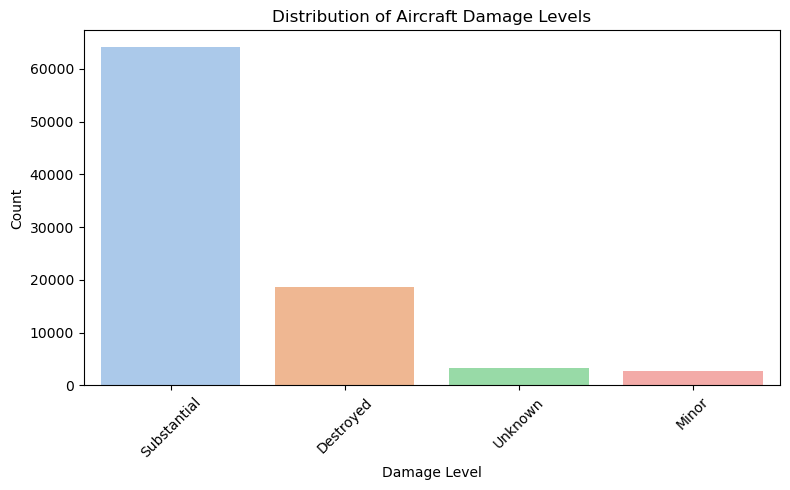

In [79]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x="Aircraft.Damage", order=df1["Aircraft.Damage"].value_counts().index, palette="pastel")
plt.title("Distribution of Aircraft Damage Levels")
plt.xlabel("Damage Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis: Causes Vs Damage

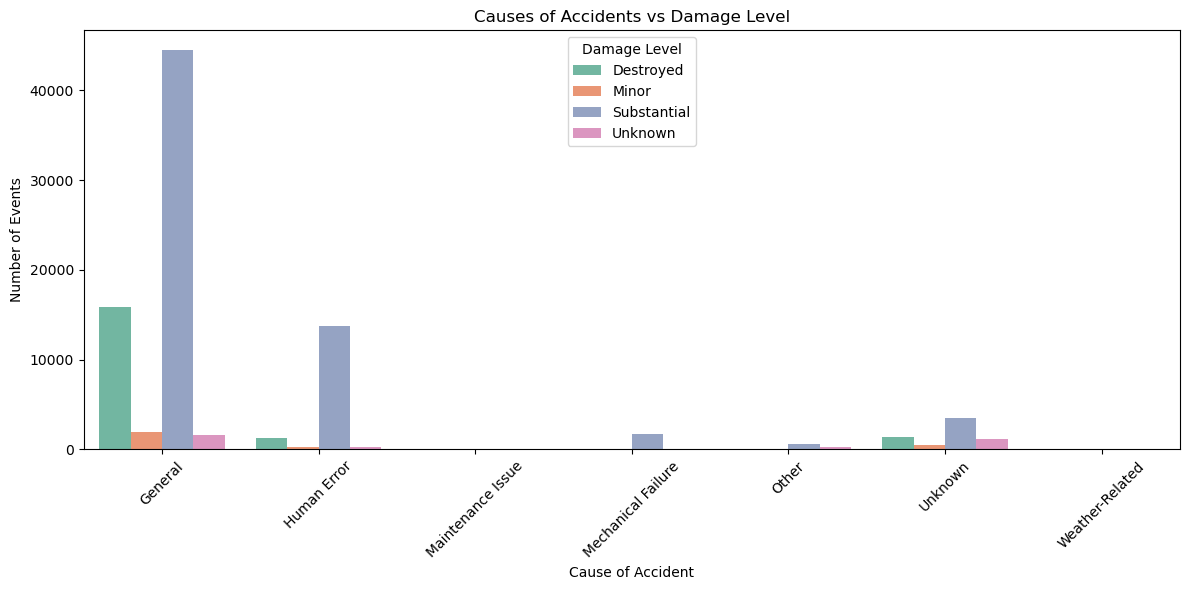

In [80]:
plot_df = df1.groupby(["Cause.Category", "Aircraft.Damage"])["Event.Id"].count().reset_index()
plot_df.columns = ["Cause Category", "Damage Level", "Event Count"]

plt.figure(figsize=(12,6))
sns.barplot(data=plot_df, x="Cause Category", y="Event Count", hue="Damage Level", palette="Set2")
plt.title("Causes of Accidents vs Damage Level")
plt.xlabel("Cause of Accident")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.legend(title="Damage Level")
plt.tight_layout()
plt.show()

### Multivariate Analysis: Cause vs Damage vs Weather

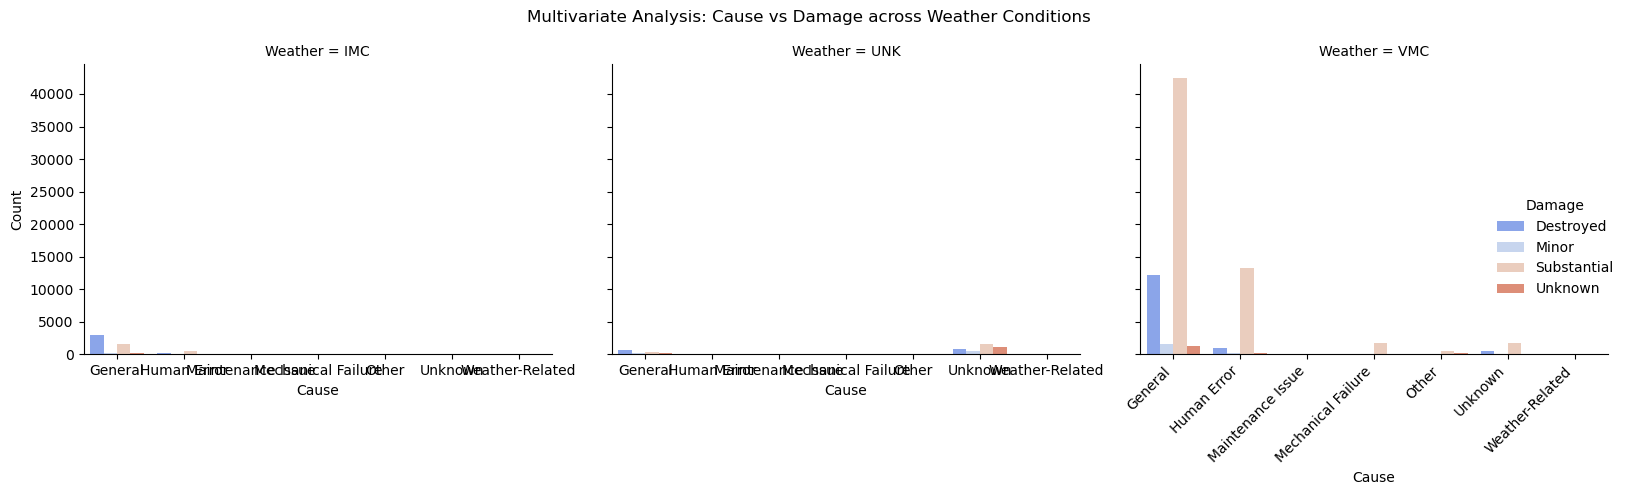

In [81]:
multi_df = df1.groupby(["Cause.Category", "Aircraft.Damage", "Weather.Condition"])["Event.Id"].count().reset_index()
multi_df.columns = ["Cause", "Damage", "Weather", "Count"]


sns.catplot(data=multi_df, x="Cause", y="Count", hue="Damage", col="Weather", kind="bar", palette="coolwarm")
plt.subplots_adjust(top=0.85)
plt.suptitle("Multivariate Analysis: Cause vs Damage across Weather Conditions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Key Insights

* Major causes of accidents and incidents are general, human error and mechanical failure.
* Most airplanes were substantially damaged in the events.
* Unexpectedly most events occurred when the weather was generally good.

## Question 4: Are the said safest airplanes useful for commercial and private operations?
To determine the uses of the top safe airplanes, if it can be used for both commercial and private enterprises, i will use `Purpose.Of.Flight` and `Far.Description`

### Data Preparation

In [82]:
columns4= ["Purpose.Of.Flight", "Far.Description"]
unique_values ={col: df1[col].unique() for col in columns4}
for col, values in unique_values.items():
    print(f"\n{col}:\n{values}\n")


Purpose.Of.Flight:
['Personal' 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application' nan
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'Air Race show'
 'PUBS' 'ASHO' 'PUBL']


Far.Description:
['Unknown' 'Part 91: General Aviation' 'Part 135: Air Taxi'
 'Part 125: Large Aircraft' 'Part 121: Air Carrier' 'Part 129: Foreign'
 'Part 137: Agricultural' 'Part 133: Rotorcraft'
 'Part 91F: Special Flight Ops' 'Foreign: Non-Commercial' 'Public Use'
 'Foreign: Commercial' 'Military' 'Part 91: Fractional' 'Other']



In [83]:
df1[columns4].value_counts()

Purpose.Of.Flight          Far.Description          
Personal                   Unknown                      31654
                           Part 91: General Aviation    17433
Instructional              Unknown                       6717
Unknown                    Unknown                       5645
Instructional              Part 91: General Aviation     3795
                                                        ...  
Public Aircraft - Federal  Military                         1
Other Work Use             Part 125: Large Aircraft         1
Executive/corporate        Part 135: Air Taxi               1
                           Part 125: Large Aircraft         1
Positioning                Part 135: Air Taxi               1
Name: count, Length: 136, dtype: int64

In [84]:
df1[columns4].isna().sum()

Purpose.Of.Flight    6137
Far.Description         0
dtype: int64

### Data Cleaning

In [85]:
# cleaning Purpose.Of.Flight by filling missing values with unknown, preserve data intergrity
df1["Purpose.Of.Flight"].fillna("Unknown", inplace=True)
df1["Purpose.Of.Flight"].isna().sum()

0

In [86]:
# normalizing to remove white spaces and cases
df1["Purpose.Of.Flight"]= (df1["Purpose.Of.Flight"].str.strip().str.title()
                           .str.replace("/","_").str.replace("-","_").str.replace("\s+", "_",regex=True)
                           .str.replace("_+","_", regex=True))
df1["Purpose.Of.Flight"].unique()

array(['Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive_Corporate', 'Aerial_Observation', 'Aerial_Application',
       'Public_Aircraft', 'Skydiving', 'Other_Work_Use', 'Positioning',
       'Flight_Test', 'Air_Race_Show', 'Air_Drop',
       'Public_Aircraft_Federal', 'Glider_Tow', 'Public_Aircraft_Local',
       'External_Load', 'Public_Aircraft_State', 'Banner_Tow',
       'Firefighting', 'Pubs', 'Asho', 'Publ'], dtype=object)

In [87]:
# Categorizing each item in the unique items according to the domain knowledge
Private_use =["Personal", "Instructional", "Executive_Corporate",
              "Skydiving","Air_Race_Show", "Air_Drop", "Glider_Tow","Flight_Test","Asho"]

Commercial_use =["Business","Ferry", "Aerial_Observation","Aerial_Application",
                 "Other_Work_Use", "Positioning","Banner_Tow","External_Load"]

Public =["Public_Aircraft_Federal","Firefighting","Public_Aircraft_State",
         "Public_Aircraft","Public_Aircraft_Local"]

Unknown =["Unknown","Pubs","Publ"]

In [88]:
df1["Flight.Purpose.Category"]= df1["Purpose.Of.Flight"].apply(
    lambda i: "Private" if i in Private_use
    else "Commercial" if i in Commercial_use
    else "Public" if i in Public
    else "Unknown")

df1["Flight.Purpose.Category"].value_counts()

Flight.Purpose.Category
Private       61374
Commercial    13465
Unknown       12929
Public         1003
Name: count, dtype: int64

In [89]:
#  cleaning Far Description by mapping to purpose that is unknown,private, commercial or government or other according to the domain knowledge on aviation
def map_far_description(desc):
    if "91" in desc:
        return "Private"
    elif any(code in desc for code in ["135", "121", "137", "133"]):
        return "Commercial"
    elif any(x in desc for x in ["Public", "Military", "Foreign"]):
        return "Government"
    elif "Unknown" in desc:
        return "Unknown"
    else:
        return "Other"
df1["FAR.Desc"] = df1["Far.Description"].apply(map_far_description)

In [90]:
#rechecking counts in Far Description
df1["FAR.Desc"].value_counts()

FAR.Desc
Unknown       57220
Private       24698
Commercial     3466
Government     3370
Other            17
Name: count, dtype: int64

### Data Analysis

In [91]:
# getting list of airplane names and filtering their full data
top_aircraft_list = Top_Safe["Aircraft.Simple"].tolist()
Top_Safe_df1 = df1[df1["Aircraft.Simple"].isin(top_aircraft_list)]
Top_Safe_df1

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.Damage,Aircraft.Category,Registration.Number,...,Broad.Phase.Of.Flight,Report.Status,Publication.Date,Aircraft.Simple,Total.Injuries,Event.Year,Cleaned.Report.Status,Cause.Category,Flight.Purpose.Category,FAR.Desc
3702,20001214X42024,Incident,LAX83IA073,1983-01-16,"LOS ANGELES, CA",United States,Incident,Minor,Unknown,N9664,...,Taxi,Probable Cause,1900-01-01 00:00:00,Boeing 747-123,0.0,1983,Probable Cause,General,Private,Unknown
4350,20001214X42620,Incident,CHI83IA162,1983-04-10,"MINNEAPOLIS, MN",United States,Incident,Minor,Unknown,N8085U,...,Landing,Probable Cause,1900-01-01 00:00:00,Douglas DC-8-71,0.0,1983,Probable Cause,General,Unknown,Unknown
4791,20001214X42899,Incident,CHI83IA228,1983-05-26,"CLARION, PA",United States,Incident,Unknown,Unknown,N154US,...,Cruise,Probable Cause,1900-01-01 00:00:00,Mcdonnell.Douglas DC-10-40,0.0,1983,Probable Cause,General,Unknown,Unknown
5529,20001214X43650,Incident,CHI83IA327,1983-07-20,"CHICAGO, IL",United States,Incident,Unknown,Unknown,N8090U,...,Landing,Probable Cause,1900-01-01 00:00:00,Douglas DC-8-71,0.0,1983,Probable Cause,General,Unknown,Unknown
7278,20001214X38628,Incident,MIA84IA064,1984-01-21,"TAMPA, FL",United States,Incident,Minor,Unknown,N401EA,...,Climb,Probable Cause,1900-01-01 00:00:00,Douglas DC-9-51,0.0,1984,Probable Cause,General,Unknown,Unknown
8264,20001214X39496,Incident,CHI84IA196,1984-05-17,"MINNEAPOLIS, MN",United States,Incident,Minor,Unknown,N150US,...,Climb,Probable Cause,1900-01-01 00:00:00,Mcdonnell.Douglas DC-10-40,0.0,1984,Probable Cause,General,Unknown,Unknown
8782,20001214X40098,Incident,NYC84IA225,1984-06-27,"PORTLAND, ME",United States,Incident,Minor,Unknown,N417PE,...,Descent,Probable Cause,1900-01-01 00:00:00,Boeing 737-130,2.0,1984,Probable Cause,General,Unknown,Unknown
10838,20001214X35647,Incident,CHI85IA118,1985-02-10,"CHAMPAIGN, IL",United States,Incident,Unknown,Unknown,N978Z,...,Go_around,Probable Cause,1900-01-01 00:00:00,Mcdonnell.Douglas DC-9,0.0,1985,Probable Cause,General,Unknown,Unknown
11103,20001214X35949,Incident,LAX85IA175B,1985-03-15,"SAN JOSE, CA",United States,Incident,Unknown,Unknown,N476AC,...,Approach,Probable Cause,1900-01-01 00:00:00,Mcdonnell.Douglas DC-9,0.0,1985,Probable Cause,General,Unknown,Unknown
11445,20001214X36146,Incident,DCA85IA019,1985-04-25,"DETROIT, MI",United States,Incident,Unknown,Unknown,N9663,...,Standing,Probable Cause,1900-01-01 00:00:00,Boeing 747-123,42.0,1985,Probable Cause,General,Unknown,Unknown


In [92]:
# grouping airplanes and their purpose
purpose_summary = Top_Safe_df1.groupby(["Aircraft.Simple", "Purpose.Of.Flight"])["Event.Id"].count().reset_index()
purpose_summary.columns = ["Airplane", "Purpose of Flight", "Event Count"]
purpose_summary.columns

Index(['Airplane', 'Purpose of Flight', 'Event Count'], dtype='object')

In [93]:
# grouping airplanes and Far desc
far_summary =Top_Safe_df1.groupby(["Aircraft.Simple", "FAR.Desc"])["Event.Id"].count().reset_index()
far_summary.columns = ["Airplane", "FAR Description", "Event Count"]
far_summary.columns

Index(['Airplane', 'FAR Description', 'Event Count'], dtype='object')

In [94]:
# defining purpose for private or commercial
def classify_purpose(purpose):
    if purpose in ["Business", "Personal", "Instructional"]:
        return "Private"
    elif purpose in ["Cargo", "Commuter", "Ferry", "Other Work Use", "Aerial Observation", "Positioning"]:
        return "Commercial"
    else:
        return "Unknown"

purpose_summary["Use Type"] = purpose_summary["Purpose of Flight"].apply(classify_purpose)

In [95]:
# defining far desc
def classify_far(far):
    if "91" in str(far):
        return "Private"
    elif any(code in str(far) for code in ["121", "135", "129"]):
        return "Commercial"
    else:
        return "Unknown"

far_summary["Use Type"] = far_summary["FAR Description"].apply(classify_far)

In [96]:
# summary of purpose use
purpose_use = purpose_summary.groupby(["Airplane", "Use Type"])["Event Count"].sum().reset_index()
purpose_use

,Airplane,Use Type,Event Count
0,Airbus.Industrie A300-600,Unknown,8
1,Boeing 737-130,Unknown,6
2,Boeing 747-123,Private,1
3,Boeing 747-123,Unknown,6
4,Douglas DC-8-71,Unknown,5
5,Douglas DC-9-51,Unknown,7
6,Mcdonnell.Douglas DC-10-40,Unknown,7
7,Mcdonnell.Douglas DC-9,Unknown,5


In [97]:
# summary of far use
far_use = far_summary.groupby(["Airplane", "Use Type"])["Event Count"].sum().reset_index()
far_use

,Airplane,Use Type,Event Count
0,Airbus.Industrie A300-600,Unknown,8
1,Boeing 737-130,Unknown,6
2,Boeing 747-123,Unknown,7
3,Douglas DC-8-71,Unknown,5
4,Douglas DC-9-51,Unknown,7
5,Mcdonnell.Douglas DC-10-40,Unknown,7
6,Mcdonnell.Douglas DC-9,Unknown,5


In [98]:
# identifying airplanes used for more than one purpose
dual_use_purpose = purpose_use.groupby("Airplane")["Use Type"].nunique().reset_index()
dual_use_purpose = dual_use_purpose[dual_use_purpose["Use Type"] > 1]
dual_use_purpose

,Airplane,Use Type
2,Boeing 747-123,2


In [99]:
# identifying airplanes used for more than one far desc
dual_use_far = far_use.groupby("Airplane")["Use Type"].nunique().reset_index()
dual_use_far = dual_use_far[dual_use_far["Use Type"] > 1]
dual_use_far

,Airplane,Use Type


### Univariate Analysis: Distribution of Purpose of Flight

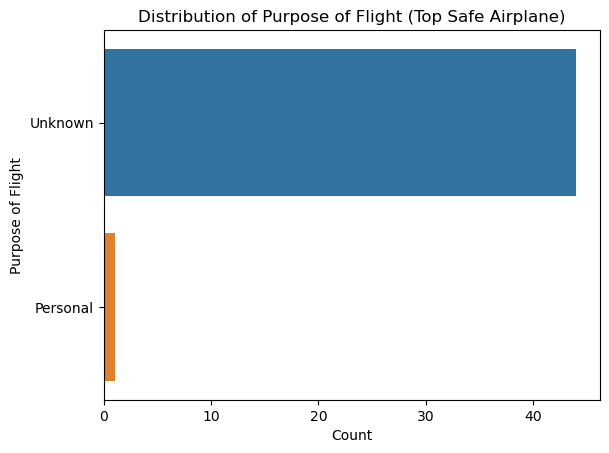

In [100]:
sns.countplot(data=Top_Safe_df1, y="Purpose.Of.Flight", order=Top_Safe_df1["Purpose.Of.Flight"].value_counts().index)
plt.title("Distribution of Purpose of Flight (Top Safe Airplane)")
plt.xlabel("Count")
plt.ylabel("Purpose of Flight")
plt.show()

### Bivariate Analysis: FAR Description by Airplanes

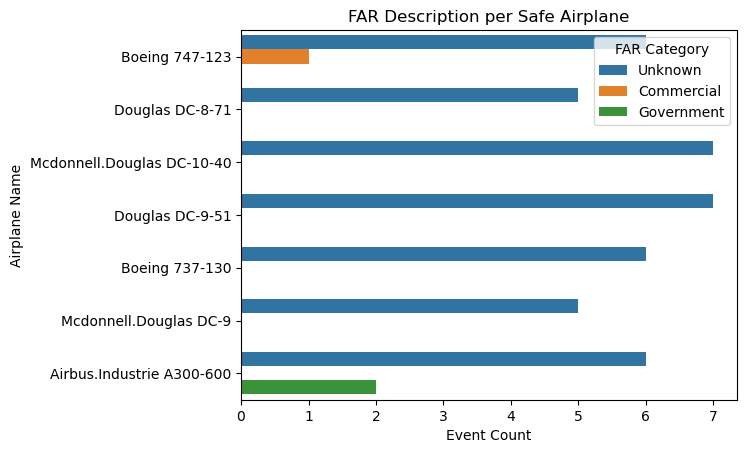

In [101]:
sns.countplot(data=Top_Safe_df1, y="Aircraft.Simple", hue="FAR.Desc")
plt.title("FAR Description per Safe Airplane")
plt.xlabel("Event Count")
plt.ylabel("Airplane Name")
plt.legend(title="FAR Category")
plt.show()

### Multivariate Analysis: Aircraft Vs FAR Vs Purpose

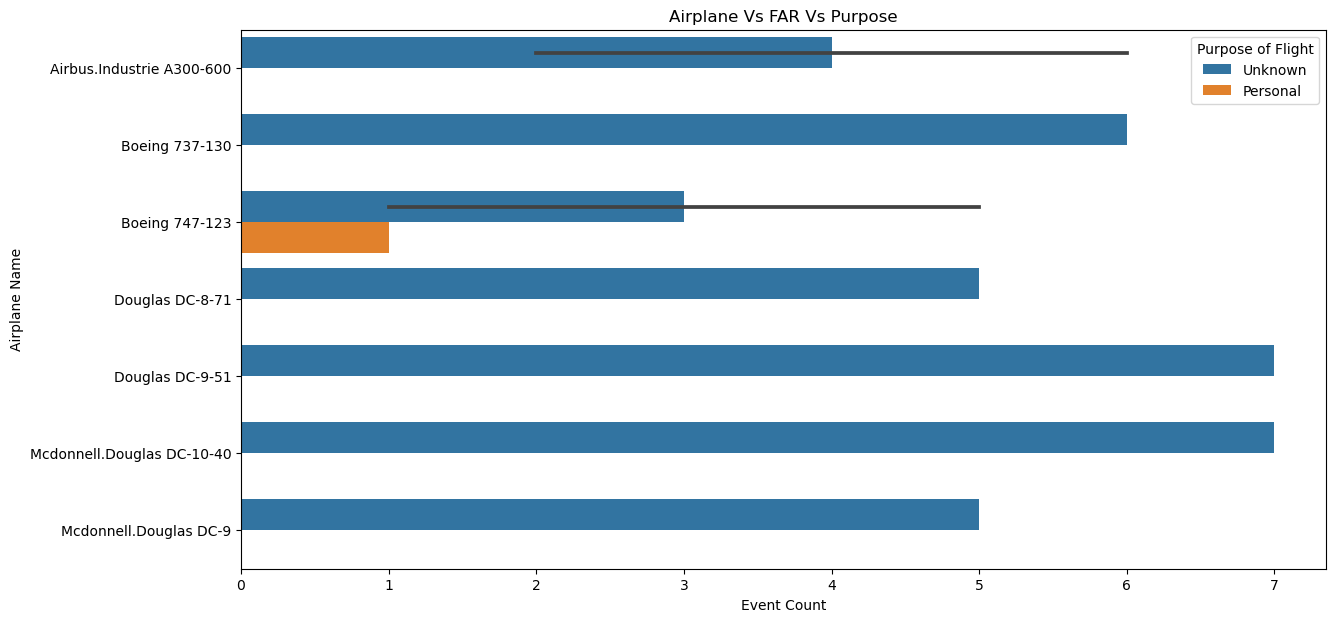

In [102]:
grouped = Top_Safe_df1.groupby(["Aircraft.Simple", "FAR.Desc", "Purpose.Of.Flight"])["Event.Id"].count().reset_index()
grouped.columns = ["Airplane", "FAR Description", "Purpose", "Event Count"]

plt.figure(figsize=(14, 7))
sns.barplot(data=grouped, x="Event Count", y="Airplane", hue="Purpose")
plt.title("Airplane Vs FAR Vs Purpose")
plt.xlabel("Event Count")
plt.ylabel("Airplane Name")
plt.legend(title="Purpose of Flight")
plt.show()

## Key Insights
Are the said safest airplanes useful for commercial and private operations?
* The data on airplanes purpose were missing, hence the outcome of unknown use high counts.
* `Boeing 747-123` clearly determined by bivariate, multivariate analysis is used for both commercial and personal.



# Final Recommendation

Based on the dataset provided and the criteria of low injury severity and minimal damage, the `Boeing 747-123` emerges as the most suitable aircraft for the new aviation division. It is not only identified as safe, but is also positively confirmed to serve both commercial and private operations, making it the ideal candidate for acquisition.

Note: There were significant data gaps in the Purpose of Flight column for many airplane types, with a high proportion of records marked as “Unknown.” This may limit full operational visibility for some aircraft.

Nevertheless, based on their strong safety profiles, defined by high event counts, low fatality rates, and low levels of aircraft damage, the following airplanes are also recommended (despite their purpose being mostly unknown):

`Airbus Industrie A300-600`

`McDonnell Douglas DC-10-40`

`Douglas DC-9-51`

`Boeing 737-130`

These airplanes are ranked among the top five safest based on injury and damage metrics, and merit consideration for future expansion once operational data is clarified.

In [103]:
df1.to_csv("Cleaned_AviationData.csv", index=False)

In [104]:
df_cleaned= pd.read_csv("Cleaned_AviationData.csv")
df_cleaned.shape

(88771, 33)

In [105]:
Top_Safe.to_csv("Top_10_Safe_Airplanes.csv")

In [106]:
Summary.to_csv("Aircraft_Event_Causes.csv", index=False)

In [110]:
purpose_use.to_csv("Purpose_Use_By_Airplane.csv", index=False)

In [114]:
far_use.to_csv("FAR_Use_By_Airplane.csv", index=False)

In [115]:
print(far_use["Use Type"].unique())


['Unknown']
